<a href="https://colab.research.google.com/github/Maulanawesome5/modern_portfolio_markowitz/blob/master/mpt_test_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [2]:
# inisialisasi jangka waktu
start_date = dt.datetime(year=2020, month=1, day=1)
end_date = dt.datetime(year=2022, month=1, day=1)

# akses data harga saham dari yahoo finance
# test = data.DataReader(["PWON.JK", "ASRI.JK"], "yahoo", start_date, end_date)
test = web.DataReader(["PWON.JK", "ASRI.JK"], "yahoo", start_date, end_date)
test = pd.DataFrame(test)
test.head()

Attributes   Adj Close           Close            High             Low  \
Symbols        PWON.JK ASRI.JK PWON.JK ASRI.JK PWON.JK ASRI.JK PWON.JK   
Date                                                                     
2020-01-02  564.864868   238.0     570     238     575     240     565   
2020-01-03  559.909912   236.0     565     236     575     240     555   
2020-01-06  540.090088   234.0     545     234     565     236     545   
2020-01-07  540.090088   236.0     545     236     550     238     535   
2020-01-08  535.135132   232.0     540     232     550     236     535   

Attributes            Open            Volume            
Symbols    ASRI.JK PWON.JK ASRI.JK   PWON.JK   ASRI.JK  
Date                                                    
2020-01-02     236     575     238  12286300   3323600  
2020-01-03     236     575     238  84199700  15815400  
2020-01-06     232     560     236  76881100   3246300  
2020-01-07     232     545     236  56419000   3340600  
2020-01-08     230     540     236  50358200   2501900

In [3]:
# ambil kolom harga close
test = test["Close"]
test

Symbols,PWON.JK,ASRI.JK
Date,,
2020-01-02,570,238
2020-01-03,565,236
2020-01-06,545,234
2020-01-07,545,236
2020-01-08,540,232
...,...,...
2021-12-24,460,162
2021-12-27,466,163
2021-12-28,478,165


In [4]:
# Log of percentage change
pwon = test["PWON.JK"].pct_change().apply(lambda x: np.log(1+x))
pwon.head

<bound method NDFrame.head of Date
2020-01-02         NaN
2020-01-03   -0.008811
2020-01-06   -0.036040
2020-01-07    0.000000
2020-01-08   -0.009217
                ...   
2021-12-24   -0.004338
2021-12-27    0.012959
2021-12-28    0.025425
2021-12-29   -0.004193
2021-12-30   -0.025533
Name: PWON.JK, Length: 489, dtype: float64>

In [7]:
# variance
var_pwon = pwon.var()
var_pwon

0.0010020343762599815

In [8]:
# Log of percentage change ASRI
asri = test["ASRI.JK"].pct_change().apply(lambda x: np.log(1+x))
asri

Date
2020-01-02         NaN
2020-01-03   -0.008439
2020-01-06   -0.008511
2020-01-07    0.008511
2020-01-08   -0.017094
                ...   
2021-12-24    0.000000
2021-12-27    0.006154
2021-12-28    0.012195
2021-12-29   -0.018349
2021-12-30    0.000000
Name: ASRI.JK, Length: 489, dtype: float64

In [9]:
# variance of asri
var_asri = asri.var()
var_asri

0.0013916886728823988

In [10]:
# volatility
pwon_vol = np.sqrt(var_pwon * 250)
asri_vol = np.sqrt(var_asri * 250)

pwon_vol, asri_vol

(0.5005083356598523, 0.5898492758498561)

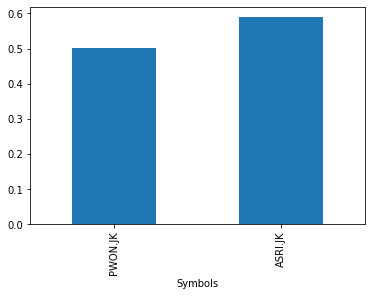

In [11]:
# Plot volatility of both stock
test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x * np.sqrt(250)).plot(kind='bar')

## Covariance

In [12]:
# Log of percentage
test1 = test.pct_change().apply(lambda x: np.log(1+x))
test1.head()

Symbols,PWON.JK,ASRI.JK
Date,,
2020-01-02,NaN,NaN
2020-01-03,-0.008811,-0.008439
2020-01-06,-0.036040,-0.008511
2020-01-07,0.000000,0.008511
2020-01-08,-0.009217,-0.017094


In [13]:
test1["PWON.JK"].cov(test1["ASRI.JK"])


0.0006991339493891837

## Correlation

In [14]:
test1["PWON.JK"].corr(test1["ASRI.JK"])

0.5920358898917099

## Expected Return

In [15]:
# calculate log of percentage
test2 = test.pct_change().apply(lambda x: np.log(1+x))
test2.head()

Symbols,PWON.JK,ASRI.JK
Date,,
2020-01-02,NaN,NaN
2020-01-03,-0.008811,-0.008439
2020-01-06,-0.036040,-0.008511
2020-01-07,0.000000,0.008511
2020-01-08,-0.009217,-0.017094


### Weights

In [16]:
# Define weights allocation
w = [0.2, 0.8]
e_r_ind = test2.mean()  # expected return individual
e_r_ind

Symbols
PWON.JK   -0.000422
ASRI.JK   -0.000788
dtype: float64

In [17]:
# Total expected return
e_r = (e_r_ind * w).sum()
e_r

-0.0007149381812945529

## Build Optimal Risky Portfolio

In [19]:
# import data
df = web.DataReader(["PWON.JK", "ASRI.JK", "BBCA.JK", "BMRI.JK"], "yahoo", start_date, end_date)
df = pd.DataFrame(df)
df.head()

Attributes   Adj Close                                     Close          \
Symbols        PWON.JK ASRI.JK      BBCA.JK      BMRI.JK PWON.JK ASRI.JK   
Date                                                                       
2020-01-02  564.864868   238.0  6346.921387  6809.337891   570.0   238.0   
2020-01-03  559.909912   236.0  6451.279297  6787.372559   565.0   236.0   
2020-01-06  540.090088   234.0  6389.613281  6677.543945   545.0   234.0   
2020-01-07  540.090088   236.0  6394.356445  6677.543945   545.0   236.0   
2020-01-08  535.135132   232.0  6337.434082  6589.681641   540.0   232.0   

Attributes                    High          ...     Low            Open  \
Symbols    BBCA.JK BMRI.JK PWON.JK ASRI.JK  ... BBCA.JK BMRI.JK PWON.JK   
Date                                        ...                           
2020-01-02  6690.0  7750.0   575.0   240.0  ...  6680.0  7650.0   575.0   
2020-01-03  6800.0  7725.0   575.0   240.0  ...  6725.0  7625.0   575.0   
2020-01-06  6735.0  7600.0   565.0   236.0  ...  6690.0  7525.0   560.0   
2020-01-07  6740.0  7600.0   550.0   238.0  ...  6730.0  7575.0   545.0   
2020-01-08  6680.0  7500.0   550.0   236.0  ...  6670.0  7375.0   540.0   

Attributes                              Volume                          \
Symbols    ASRI.JK BBCA.JK BMRI.JK     PWON.JK     ASRI.JK     BBCA.JK   
Date                                                                     
2020-01-02   238.0  6695.0  7675.0  12286300.0   3323600.0  49445000.0   
2020-01-03   238.0  6750.0  7750.0  84199700.0  15815400.0  47755500.0   
2020-01-06   236.0  6720.0  7650.0  76881100.0   3246300.0  27300000.0   
2020-01-07   236.0  6735.0  7725.0  56419000.0   3340600.0  45022500.0   
2020-01-08   236.0  6670.0  7550.0  50358200.0   2501900.0  53692500.0   

Attributes              
Symbols        BMRI.JK  
Date                    
2020-01-02  18689900.0  
2020-01-03  35147300.0  
2020-01-06  30946000.0  
2020-01-07  35447800.0  
2020-01-08  52540300.0  

[5 rows x 24 columns]

In [20]:
# Close price
df = df["Close"]
df.head()

Symbols,PWON.JK,ASRI.JK,BBCA.JK,BMRI.JK
Date,,,,
2020-01-02,570.0,238.0,6690.0,7750.0
2020-01-03,565.0,236.0,6800.0,7725.0
2020-01-06,545.0,234.0,6735.0,7600.0
2020-01-07,545.0,236.0,6740.0,7600.0
2020-01-08,540.0,232.0,6680.0,7500.0


## Covariance and Correlation matrix

In [21]:
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,PWON.JK,ASRI.JK,BBCA.JK,BMRI.JK
Symbols,,,,
PWON.JK,0.001002,0.000699,0.000304,0.000475
ASRI.JK,0.000699,0.001392,0.000300,0.000468
BBCA.JK,0.000304,0.000300,0.000387,0.000339
BMRI.JK,0.000475,0.000468,0.000339,0.000718


In [22]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,PWON.JK,ASRI.JK,BBCA.JK,BMRI.JK
Symbols,,,,
PWON.JK,1.000000,0.592036,0.488025,0.560538
ASRI.JK,0.592036,1.000000,0.408273,0.468138
BBCA.JK,0.488025,0.408273,1.000000,0.642839
BMRI.JK,0.560538,0.468138,0.642839,1.000000


## Portfolio Variance

In [23]:
w = {"PWON.JK":0.1, "ASRI.JK":0.2, "BBCA.JK":0.5, "BMRI.JK":0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.00043354763975707794

## Portfolio expected return

In [24]:
# Yearly return for individual companies
ind_er = df.resample("Y").last().pct_change().mean()
ind_er

Symbols
PWON.JK   -0.090196
ASRI.JK   -0.330579
BBCA.JK    0.078287
BMRI.JK    0.110672
dtype: float64

In [25]:
# Portfolio return
w = [0.1, 0.2, 0.5, 0.2]
port_er = (w * ind_er).sum()
port_er

-0.013857643797876202

### Plotting Efficient Frontier

In [26]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
PWON.JK    0.500508
ASRI.JK    0.589849
BBCA.JK    0.310949
BMRI.JK    0.423657
dtype: float64

In [27]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
PWON.JK,-0.090196,0.500508
ASRI.JK,-0.330579,0.589849
BBCA.JK,0.078287,0.310949
BMRI.JK,0.110672,0.423657


# MASIH GAGAL SAMPAI DI TITIK INI

### PROSES LOOPING LAMA

31/07/2022 01:24 -> Berhasil selesai loop dalam 1 jam 57 menit memakai google colab

In [28]:
p_ret = []          # Define an empty array for portfolio returns
p_vol = []          # Define an empty array for portfolio volatility
p_weights = []      # Define an empty array for asset weights

num_assets = len(df.columns)
# num_portfolios = 100000000  # saldo Rp. 100 juta, membuat loop menjadi lama
num_portfolios = 5000000  # saldo Rp. 5 juta

for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

portfolios = pd.DataFrame(data)
portfolios.head()

,Returns,Volatility,PWON.JK weight,ASRI.JK weight,BBCA.JK weight,BMRI.JK weight
0,-0.058468,0.371748,0.331841,0.214538,0.241426,0.212195
1,-0.064678,0.397651,0.337984,0.238536,0.068104,0.355376
2,-0.071904,0.364362,0.182782,0.306838,0.323250,0.187129
3,-0.009141,0.354656,0.288348,0.120247,0.272786,0.318619
4,-0.040947,0.329945,0.017365,0.285224,0.687834,0.009578


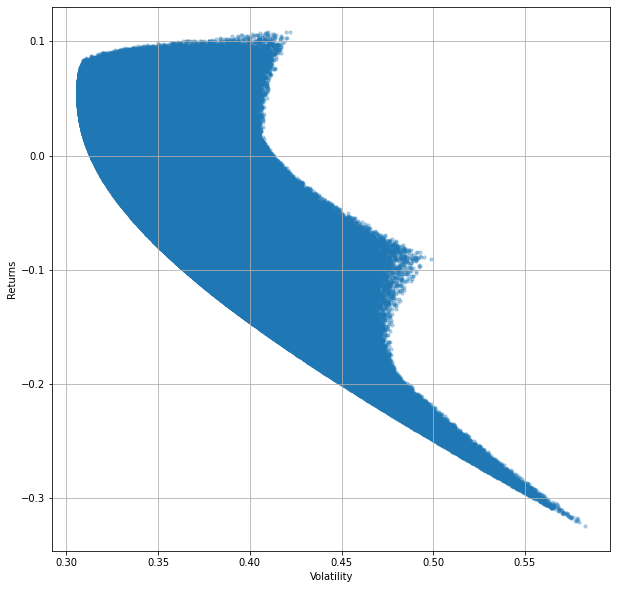

In [34]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [35]:
# minimum volatility portfolio
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
min_vol_port

Returns           0.053953
Volatility        0.306276
PWON.JK weight    0.072087
ASRI.JK weight    0.034701
BBCA.JK weight    0.831443
BMRI.JK weight    0.061768
Name: 3954439, dtype: float64

## Plotting the minimum volatility portfolio

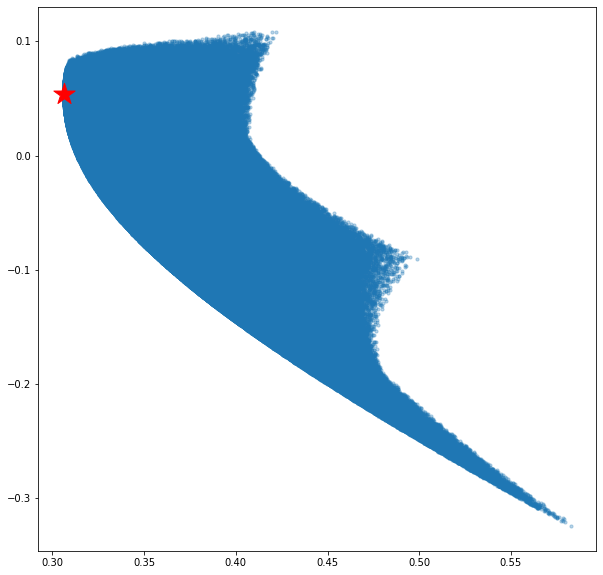

In [36]:
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

## Optimal Risky Portfolio

In [37]:
# Finding the optimal portfolio
risk_factor = 0.1
optimal_risky_port = portfolios.iloc[
    ( (portfolios['Returns'] - risk_factor) / portfolios['Volatility']).idxmax()
    ]
optimal_risky_port

Returns           0.108323
Volatility        0.410120
PWON.JK weight    0.000506
ASRI.JK weight    0.000621
BBCA.JK weight    0.060925
BMRI.JK weight    0.937948
Name: 3294956, dtype: float64

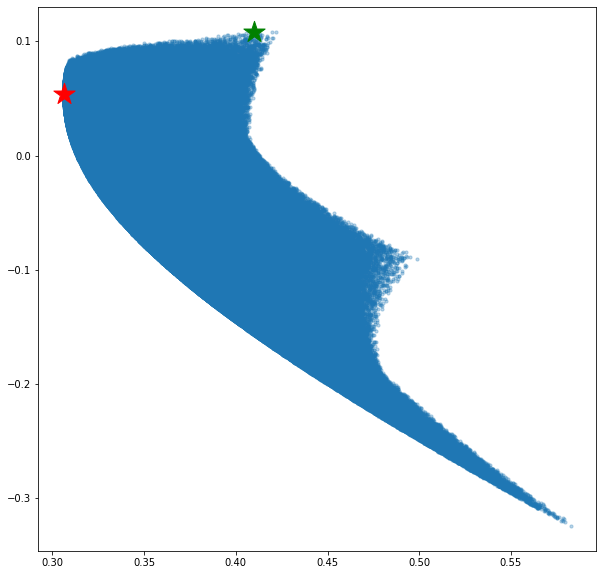

In [38]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)